# Importation des modules / fonctions nécessaires

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from numpy.random import gamma, normal
import seaborn as sns

# Préparation des données

In [2]:
K = 120
r1 = np.array([3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6,  
               5, 15, 4, 9, 9, 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 
               8, 11, 5, 12, 8, 17, 9, 3, 2, 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 
               4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14, 16, 17, 8, 8, 9, 5, 
               9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9, 4, 4, 9, 
               9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 
               7, 5, 7, 6, 3, 7])
n1 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
r0 = np.array([0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 
               4, 1, 4, 5, 2, 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 
               5, 6, 6, 10, 7, 5, 5, 2, 8, 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 
               8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5, 10, 3, 2, 1, 7, 9, 13, 
               9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7, 7, 4, 2, 
               3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1])
n0 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
year = np.array([-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, 
                 -5, -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, 
                 -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, 
                 -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 
                 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 
                 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10])

In [47]:
# On vérifie que les données sont de la bonne taille
[len(r1) == K, len(n1) == K, len(r0) == K, len(n0) == K, len(year) == K]

[True, True, True, True, True]

# Initialisation

In [4]:
init_alpha = 0
init_beta1 = 0
init_beta2 = 0
init_sigma = 1/10
init_mu = np.zeros(120)
init_b  = np.zeros(120)

# Algorithme Hastings-within-Gibbs

In [12]:
def oxford(nchain, init_alpha, init_beta1, init_beta2, init_sigma, init_mu, init_b, prop_sd, K, r1, n1, r0, n0, year):
    
    ## nchain: taille de la chaine
    ## init_alpha, init_beta1, init_beta2, init_sigma, init_mu, init_b: valeurs initiales
    ## prop_sd: les variances pour les marches aléatoires des propositions
    ## K: la taille des données
    ## r1, n1, r0, n0, year: les données
    ##
    ## Cette fonction utilise l'échantillonneur Hastings-within-Gibbs pour simuler alpha, beta1, beta2 et sigma**2
    
    alpha = init_alpha
    beta1 = init_beta1
    beta2 = init_beta2
    sigma = init_sigma
    mu = init_mu
    b = init_b 
    
    log_psi = alpha + beta1 * year + beta2 * (year**2 - 22) + b
    p0 = expit(mu)
    p1 = expit(mu + log_psi)
    
    chain = np.zeros((nchain+1, 4)) # chaine de alpha, beta1, beta2 et sigma **2
    b_chain = np.zeros((nchain+1, K)) # chaine de b
    mu_chain = np.zeros((nchain+1, K)) # chaine de mu
    
    acc_rate = np.zeros(3)
    b_acc_rate = np.zeros(K)
    mu_acc_rate = np.zeros(K)
    
    # Initialisation de la chaîne
    chain[0,0] = init_alpha
    chain[0,1] = init_beta1
    chain[0,2] = init_beta2
    chain[0,3] = init_sigma
    b_chain[0,:] = init_b
    mu_chain[0,:] = init_mu

    for i in range(nchain):
        
        # Mise à jour de alpha
        prop = normal(loc = alpha, scale = prop_sd[0])
        prop_log_psi = prop + beta1 * year + beta2 * (year**2 - 22) + b
        prop_p1 = expit(mu + prop_log_psi)
        
        top = - (prop**2 / (2 * 1e6)) + sum(r1 * np.log(prop_p1)) + sum((n1-r1) * np.log(1 - prop_p1))
        bottom = - (alpha**2 / (2 * 1e6)) + sum(r1 * np.log(p1)) + sum((n1-r1) * np.log(1 - p1))
        
        acc_prob = np.exp(top - bottom)
        
        if np.random.uniform() < acc_prob:
            alpha = prop
            log_psi = prop_log_psi
            p1 = prop_p1
            acc_rate[0] += 1
        
        # Mise à jour de beta1
        prop = normal(loc = beta1, scale = prop_sd[1])
        prop_log_psi = alpha + prop * year + beta2 * (year**2 - 22) + b
        prop_p1 = expit(mu + prop_log_psi)
        
        top = - (prop**2 / (2 * 1e6)) + sum(r1 * np.log(prop_p1)) + sum((n1-r1) * np.log(1 - prop_p1))
        bottom = - (beta1**2 / (2 * 1e6)) + sum(r1 * np.log(p1)) + sum((n1-r1) * np.log(1 - p1))
        
        acc_prob = np.exp(top - bottom)
        
        if np.random.uniform() < acc_prob:
            beta1 = prop
            log_psi = prop_log_psi
            p1 = prop_p1
            acc_rate[1] += 1
            
        # Mise à jour de beta2
        prop = normal(loc = beta2, scale = prop_sd[2])
        prop_log_psi = alpha + beta1 * year + prop * (year**2 - 22) + b
        prop_p1 = expit(mu + prop_log_psi)
        
        top = - (prop**2 / (2 * 1e6)) + sum(r1 * np.log(prop_p1)) + sum((n1-r1) * np.log(1 - prop_p1))
        bottom = - (beta2**2 / (2 * 1e6)) + sum(r1 * np.log(p1)) + sum((n1-r1) * np.log(1 - p1))
        
        acc_prob = np.exp(top - bottom)
        
        if np.random.uniform() < acc_prob:
            beta2 = prop
            log_psi = prop_log_psi
            p1 = prop_p1
            acc_rate[2] += 1
            
        # Mise à jour de sigma
        sigma = 1 / gamma(shape = 1e-3 + K/2, scale = 1e-3 + 0.5 * sum(b**2))
            
        for j in range(K):
            
            # Mise à jour de mu
            prop = normal(loc = mu[j], scale = prop_sd[3])
            prop_p0_j = expit(prop)
            prop_p1_j = expit(prop + log_psi[j])
            
            top = - (prop**2 / (2 * 1e6)) + r0[j] * np.log(prop_p0_j) + (n0[j] - r0[j]) * np.log(1 - prop_p0_j) + r1[j] * np.log(prop_p1_j) + (n1[j] - r1[j]) * np.log(1 - prop_p1_j)
            bottom = - (mu[j]**2 / (2 * 1e6)) + r0[j] * np.log(p0[j]) + (n0[j] - r0[j]) * np.log(1 - p0[j]) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top - bottom)
            
            if np.random.uniform() < acc_prob:
                mu[j] = prop
                p0[j] = prop_p0_j
                p1[j] = prop_p1_j
                mu_acc_rate[j] += 1
                
            # Mise à jour de b
            prop = normal(loc = b[j], scale = prop_sd[4])
            prop_log_psi_j = alpha + beta1 * year[j] + beta2 * (year[j]**2 - 22) + prop
            prop_p1_j = expit(mu[j] + prop_log_psi_j)
            
            top = - (prop**2 / (2 * sigma)) + r1[j] * np.log(prop_p1_j) + (n1[j] - r1[j]) * np.log(1 - prop_p1_j)
            bottom = - (b[j]**2 / (2 * sigma)) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top - bottom)
            
            if np.random.uniform() < acc_prob:
                b[j] = prop
                log_psi[j] = prop_log_psi_j
                p1[j] = prop_p1_j
                b_acc_rate[j] += 1
        
        # Mise à jour des chaines
        chain[i+1,:] = np.array([alpha, beta1, beta2, sigma])
        b_chain[i+1,:] = b 
        mu_chain[i+1,:] = mu
        
    return(chain, b_chain, mu_chain, acc_rate, b_acc_rate, mu_acc_rate)  

In [206]:
chain, b_chain, mu_chain, acc_rate, b_acc_rate, mu_acc_rate = oxford(10000, init_alpha, init_beta1, init_beta2, init_sigma, init_mu, init_b, np.array([0.05, 0.01, 0.003, 0.1, 0.5]), K, r1, n1, r0, n0, year)

# Visualisation des résultats

## Visualisation de $\alpha$

Text(0.5, 1.0, 'variations de alpha')

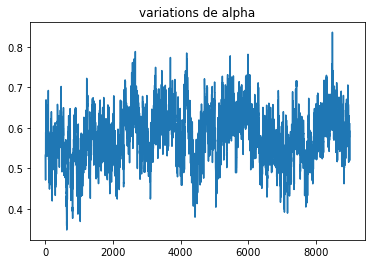

In [207]:
plt.plot(chain[:,0][1000:])
plt.title("variations de alpha")

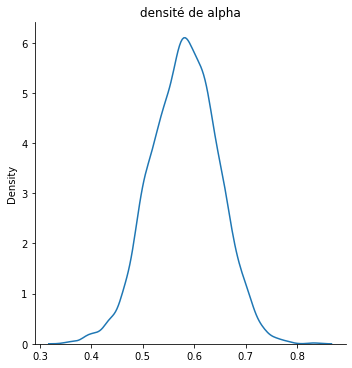

In [208]:
sns.displot(chain[:,0][1000:], kind="kde").set(title='densité de alpha')

In [209]:
print("Le taux d'acceptation de alpha :" + str(acc_rate[0] / 100) + "%")
print("La moyenne empirique de alpha :" + str(np.mean(chain[:,0])))
print("L'écart-type empirique de alpha :" + str(np.std(chain[:,0])))

Le taux d'acceptation de alpha :61.95%
La moyenne empirique de alpha :0.5771716125606073
L'écart-type empirique de alpha :0.0670322607119847


## Visualisation de $\beta_1$

Text(0.5, 1.0, 'variations de beta1')

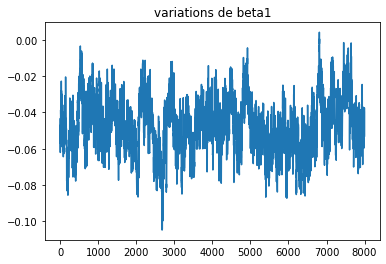

In [210]:
plt.plot(chain[:,1][1000:9000])
plt.title("variations de beta1")

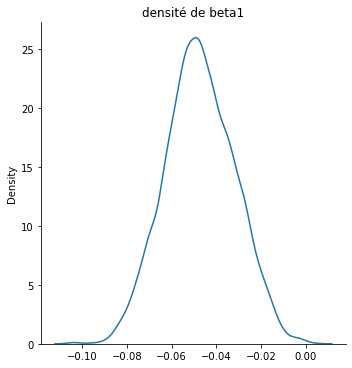

In [211]:
sns.displot(chain[:,1][1000:], kind="kde").set(title='densité de beta1')

In [212]:
print("Le taux d'acceptation de beta1 :" + str(acc_rate[1] / 100) + "%")
print("La moyenne empirique de beta1 :" + str(np.mean(chain[:,1])))
print("L'écart-type empirique de beta1 :" + str(np.std(chain[:,1])))

Le taux d'acceptation de beta1 :68.36%
La moyenne empirique de beta1 :-0.046815554200005015
L'écart-type empirique de beta1 :0.015514243930012977


## Visualisation de $\beta_2$

Text(0.5, 1.0, 'variations de beta2')

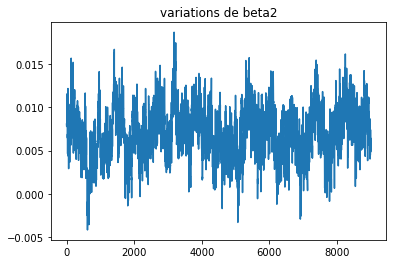

In [213]:
plt.plot(chain[:,2][1000:])
plt.title("variations de beta2")

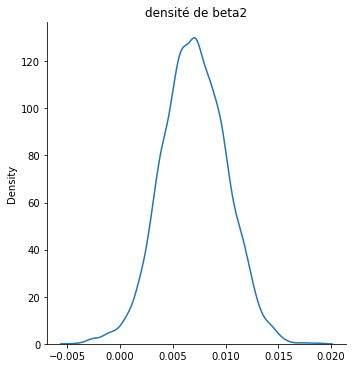

In [214]:
sns.displot(chain[:,2][1000:], kind="kde").set(title='densité de beta2')

In [215]:
print("Le taux d'acceptation de beta2 :" + str(acc_rate[2] / 100) + "%")
print("La moyenne empirique de beta2 :" + str(np.mean(chain[:,2])))
print("L'écart-type empirique de beta2 :" + str(np.std(chain[:,2])))

Le taux d'acceptation de beta2 :53.64%
La moyenne empirique de beta2 :0.0069965912929713416
L'écart-type empirique de beta2 :0.0029757552824485932


## Visualisation de $\sigma$

Text(0.5, 1.0, 'variations de sigma')

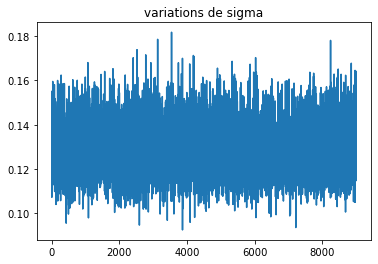

In [216]:
plt.plot(np.sqrt(chain[:,3][1000:]))
plt.title("variations de sigma")

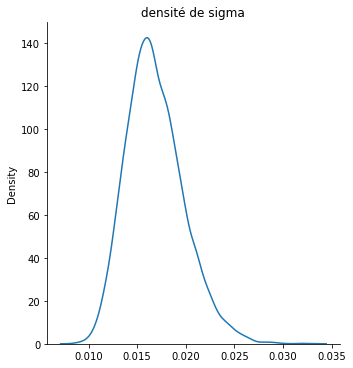

In [217]:
sns.displot(chain[:,3][1000:], kind="kde").set(title='densité de sigma')

In [218]:
print("La moyenne empirique de sigma :" + str(np.mean(np.sqrt(chain[:,3]))))
print("L'écart-type empirique de sigma :" + str(np.std(np.sqrt(chain[:,3]))))

La moyenne empirique de sigma :0.12936744841384987
L'écart-type empirique de sigma :0.011447663222618441
